##  Analysis of Employee Exit Surveys
This project focus on cleaning and analysing exit surveys from employees of the [Department of Education, Training and Employment]('https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland') (DETE) and the [Technical and Further Education]('https://en.wikipedia.org/wiki/Technical_and_further_education') (TAFE) body of the Queensland government in Australia. The DETE exit survey can be found [hear]('https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey'), meanwhile, the original dataset for the TAFE exit survey is no longer available. We, have made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`)

### Objective
The objective of this analysis is to combine the results for both surveys to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The stakeholders want us to combine results from both surveys and answer above questions. Although both surveys used the same template, one of them had customized answers.

### Data Dictionary
Below are the available columns in both datasets<br> 
*dete_survey.csv*<br> 
- `ID`: An id used to identify the participant of the survey<br> 
- `SeparationType`: The reason why the person's employment ended<br> 
- `Cease Date`: The year or month the person's employment ended<br> 
- `DETE Start Date`: The year the person began employment with the DETE<br> 

*tafe_survey.csv*<br> 
- `Record ID`: An id used to identify the participant of the survey.
- `Reason for ceasing employment`: The reason why the person's employment ended.
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

### SUMMARY OF FINDINGS
Employees with more years of service have a higher likelihood of resigning due to dissatisfaction compare 

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the dete survey data
dete_survey = pd.read_csv('dete_survey.csv')
# View the first five records
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
# Read in the tafe survey data
tafe_survey = pd.read_csv("tafe_survey.csv")

# View the first five records
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.isna().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

The following observations be made from the above analysis.

- The dete_survey dataframe contains `Not Stated` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied
- Both dataframe contains null values
- `dete_survey` have 822 rows with 56 columns, while `tafe_survey` have 702 rows with 72 colums

### Identify Missing Values and Drop Unneccessary Columns
First, we'll correct the `Not Stated` values and drop some of the columns we don't need for our analysis.

In [8]:
#  Read in the data again, but set the `Not Sated` values to `NaN` 
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [9]:
#  Remove the columns we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Preview to confirm the columns were drpped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In order to avoid working with columns that are needed, we dropped `[28:48]` columns from `dete_survey` data, we also dropped 
`[17:66]` columns from `tafe_survey` data.

### Rename Columns
We will rename the column names to make them suitable for our analysis 

In [10]:
# Clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')
#  Check to confirm that the cloumn names were updated correctly
dete_survey_updated.columns


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
# Update column names to match the names in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check that the specified column names were updated correctly
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Data Filtering
Since our focus is on employees who resigned, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string '`Resignation`.

In [12]:
# Check the unique values for the separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
# Check the unique values for the separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

It can be observed that both datasets have varying seperation types, hence we have to account for this variations so that we don’t  unintentionally drop important data.

In [15]:
#  Select only the resignation separation types from each dataframe
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()


In each of dataframes, we select only the data for survey respondents who have a Resignation separation type.

### Verify the Year Column
The nest step is for us to clean and explore the `cease_date` and `dete_start_date` columns to make sure all of the years are in order. We'll use the following criteria:

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't practical to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [16]:
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

It could be observed from the data above that the year formats are not uniform, some are `YYYY`, while some are `MM/YYYY` format. Hence, goin Forward, we need to formarlise the date to have a uniform date format.




In [17]:
# Extract the years and convert them to a float data type
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1]
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype('float')


In [18]:
# Confirm the values again and look for outliers
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
# Check the unique values and look for outliers
dete_resignation['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [20]:
# Check the unique values
tafe_resignation['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

We can deduce from above that the years in both dataframes don't completely align. The `tafe_survey_updated` dataframe contains some cease dates in `2009`, but the `dete_survey_updated` dataframe does not. The `tafe_survey_updated` dataframe also contains `68` cease dates in `2010`, while the `dete_survey_updaed` contains only `2`.<br> 
Since we aren't so concerned with analyzing the results by year, we'll leave them as is.


### Create a New Column
Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

- End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
The `tafe_resignation` dataframe already contains a "`service`" column, which we renamed to `institute_service`.

Next step, we calculate the years of service in the `dete_survey_updated` dataframe by subtracting the `dete_start_date` from the `cease_date` and create a new column named `institute_service`.

In [21]:
# Calculate the year of service an employee spent in their respective workplace and create a new column
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

# Check out the result
dete_resignation['institute_service'].head()



3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Identify Dissatisfied Employees
Next, we'll identify employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

*tafe_survey_updated*:<br>
`Contributing Factors. Dissatisfaction`<br>
`Contributing Factors. Job Dissatisfaction`<br>
*dafe_survey_updated*<br>
`job_dissatisfaction`<br>
`dissatisfaction_with_the_department`<br>
`physical_work_environment`<br>
`lack_of_recognition`<br>
`lack_of_job_security`<br>
`work_location`<br>
`employment_conditions`<br>
`work_life_balance`<br>
`workload`


If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

`True`: indicates a person resigned because they were dissatisfied in some way<br>
`False`: indicates a person resigned because of a reason other than dissatisfaction with the job<br>
`NaN`: indicates the value is missing

In [22]:
# Check for unique values
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
# Check for unique values
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignation_up = tafe_resignation.copy()

# Check the unique values after the updates
tafe_resignation_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [25]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignation_up = dete_resignation.copy()
dete_resignation_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

It appears `DETE` have `149` `True` for dissatisfaction, while `TAFE` have `91`.

### Combining the Data
Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [26]:
# Add an institute column to both DataFrame
dete_resignation_up['institute'] = 'DETE'
tafe_resignation_up['institute'] = 'TAFE'

In [27]:
# Combine the 2 DataFrames
combined = pd.concat([dete_resignation, tafe_resignation], ignore_index=True)

# Verify the number of non null values in each column
combined.isnull().sum().sort_values()


id                                                       0
separationtype                                           0
dissatisfied                                             8
cease_date                                              16
position                                                53
employment_status                                       54
age                                                     55
gender                                                  59
institute_service                                       88
Institute                                              311
WorkArea                                               311
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Ill Health                       319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Job Dissatisfaction              3

Almost all the columns have null values, with the exception of `id` and `separationtype `

In [28]:
dete_resignation['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

In [29]:
# Drop columns with less than 500 non null value
combined_updated = combined.dropna(thresh=500, axis=1).copy()

### Clean the Service Column
Next, we'll clean the `institute_service` column and categorize employees according to the following definitions:

- `New`: Less than 3 years in the workplace
- `Experienced`: 3-6 years in the workplace
- `Established`: 7-10 years in the workplace
- `Veteran`: 11 or more years in the workplace
Our analysis is based on [this article]('https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage'), which agreed with the popular saying that `Age is just a number`, the article went further to makes the argument that understanding employee's needs according to career stage instead of age is more effective

In [30]:
# Check the unique values in institute_service
combined_updated['institute_service'].value_counts(dropna=False).reset_index()



,index,institute_service
0,NaN,88
1,Less than 1 year,73
2,1-2,64
3,3-4,63
4,5-6,33
5,11-20,26
6,5,23
7,1,22
8,7-10,21
9,0,20


We noticed that majority of the employess have worked for more than 20 years, whiel few have worked for less than 10 years.

Now, we'll extract the years of service from each value in the `institute_service` column.

In [31]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts().reset_index()

,index,institute_service_up
0,1.0,159
1,3.0,83
2,5.0,56
3,7.0,34
4,11.0,30
5,0.0,20
6,20.0,17
7,6.0,17
8,4.0,16
9,9.0,14


In [32]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts().reset_index()

,index,service_cat
0,New,193
1,Experienced,172
2,Veteran,136
3,Established,62


Finally, we'll replace the missing values in the `dissatisfied` column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each `service_cat` group and plot the results.

In [33]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False).reset_index()

,index,dissatisfied
0,False,403
1,True,240
2,NaN,8


In [34]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


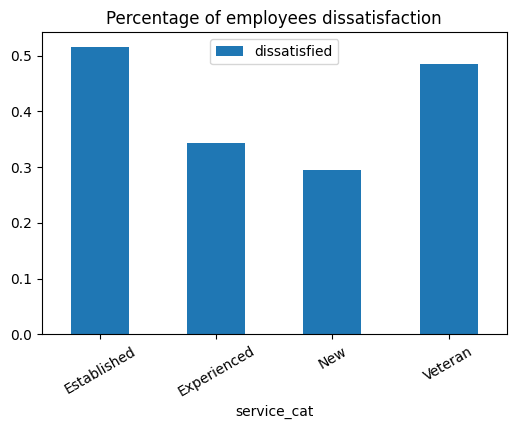

In [35]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
dis_pct.plot(kind='bar',  title='Percentage of employees dissatisfaction', rot=30)

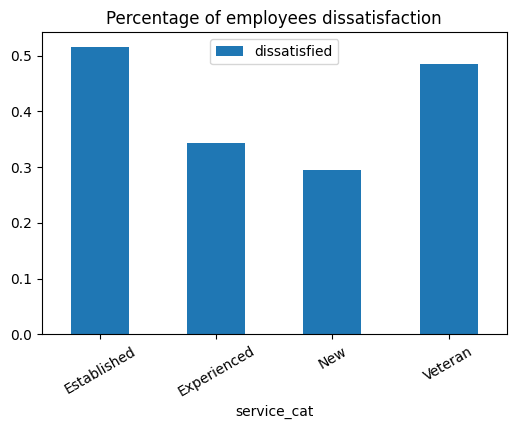

In [36]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
dis_pct.plot(kind='bar',  title='Percentage of employees dissatisfaction', rot=30)

## Conclusion
Generally, the results of our analysis shows that employees with at least 7 years of service are likely to resign due to dissatisfaction, while employees with less than 7 years of service are not likely to resign.

Going by the service categories, employees in Established and Veteran categories have a higher likelihood to resign.

**NOTE:** Other factors that could be considered for employees resignation are `Age`, `Role`, `Contract type` among others.